# ADME 数据集模型表现对比图

本 Notebook 将完成以下任务：
1. 读取 `assets/adme_splitting.xlsx`
2. 绘制 4×1 子图（四行）
3. 分别展示所有模型在 `HLM`、`MDR1(ER)`、`SOL(Solub)`、`HPPB(hPPB)` 上的表现

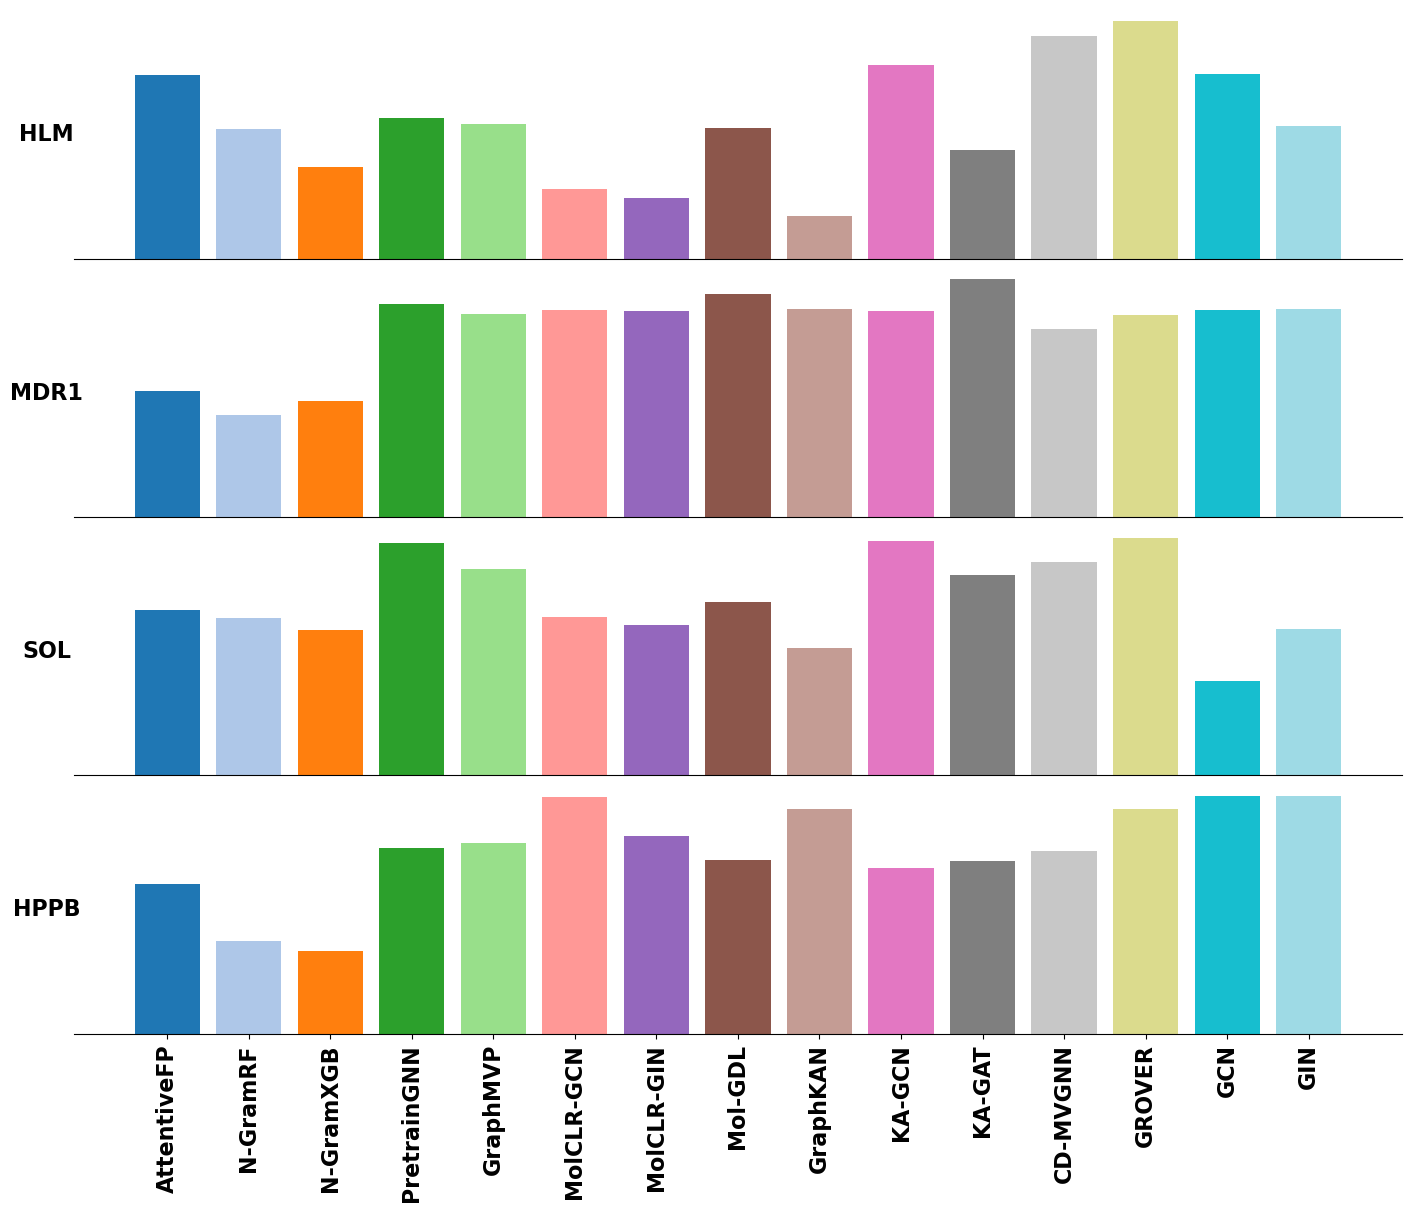

,Model,Split,HLM,RLM,ER,Solub,hPPB,rPPB
0,AttentiveFP,Time,0.4377,0.4694,0.3783,0.3917,0.5843,0.4222
1,N-GramRF,Time,0.3080,0.1429,0.3069,0.3739,0.3621,0.2404
2,N-GramXGB,Time,0.2194,0.1839,0.3487,0.3448,0.3244,0.1651
3,PretrainGNN,Time,0.3357,0.2222,0.6413,0.5498,0.7269,0.4867
4,GraphMVP,Time,0.3201,0.1116,0.6107,0.4901,0.7450,0.5180


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Global font style
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 11

# 1) Read data
candidate_paths = [
    Path("../assets/adme_splitting.xlsx"),
    Path("assets/adme_splitting.xlsx"),
]

file_path = next((p for p in candidate_paths if p.exists()), None)
if file_path is None:
    raise FileNotFoundError("Cannot find assets/adme_splitting.xlsx")

df = pd.read_excel(file_path)

# 2) Dataset mapping required by user
# HLM -> HLM, MDR1 -> ER, SOL -> Solub, HPPB -> hPPB
dataset_columns = [
    ("HLM", "HLM"),
    ("MDR1", "ER"),
    ("SOL", "Solub"),
    ("HPPB", "hPPB"),
]

# Keep model order exactly as in Excel
ordered_models = df["Model"].astype(str).tolist()
unique_models = list(dict.fromkeys(ordered_models))

# Assign a distinct color for each model (consistent across all subplots)
cmap = plt.get_cmap("tab20", len(unique_models))
model_color = {model: cmap(i) for i, model in enumerate(unique_models)}

label_fontsize = 16

# 3) Draw 4x1 figure
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=False, constrained_layout=True)

for row_idx, (ax, (dataset_name, col_name)) in enumerate(zip(axes, dataset_columns)):
    data = df[["Model", col_name]].dropna().copy()

    x = np.arange(len(data))
    colors = [model_color[m] for m in data["Model"].astype(str)]

    ax.bar(x, data[col_name].values, color=colors)

    # Hide left numeric ticks and y-axis label; keep only dataset name on the left
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylabel(
        dataset_name,
        rotation=0,
        labelpad=20,
        va="center",
        fontsize=label_fontsize,
        fontweight="bold",
    )

    # Keep subtle horizontal guide lines
    ax.grid(axis="y", linestyle="--", alpha=0.25)

    # Only show model names on the bottom subplot
    if row_idx < 3:
        ax.set_xticks([])
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(
            data["Model"].astype(str),
            rotation=90,
            ha="center",
            va="top",
            fontsize=label_fontsize,
            fontweight="bold",
        )
        ax.set_xlabel("")

# Remove top title
plt.show()

df.head()

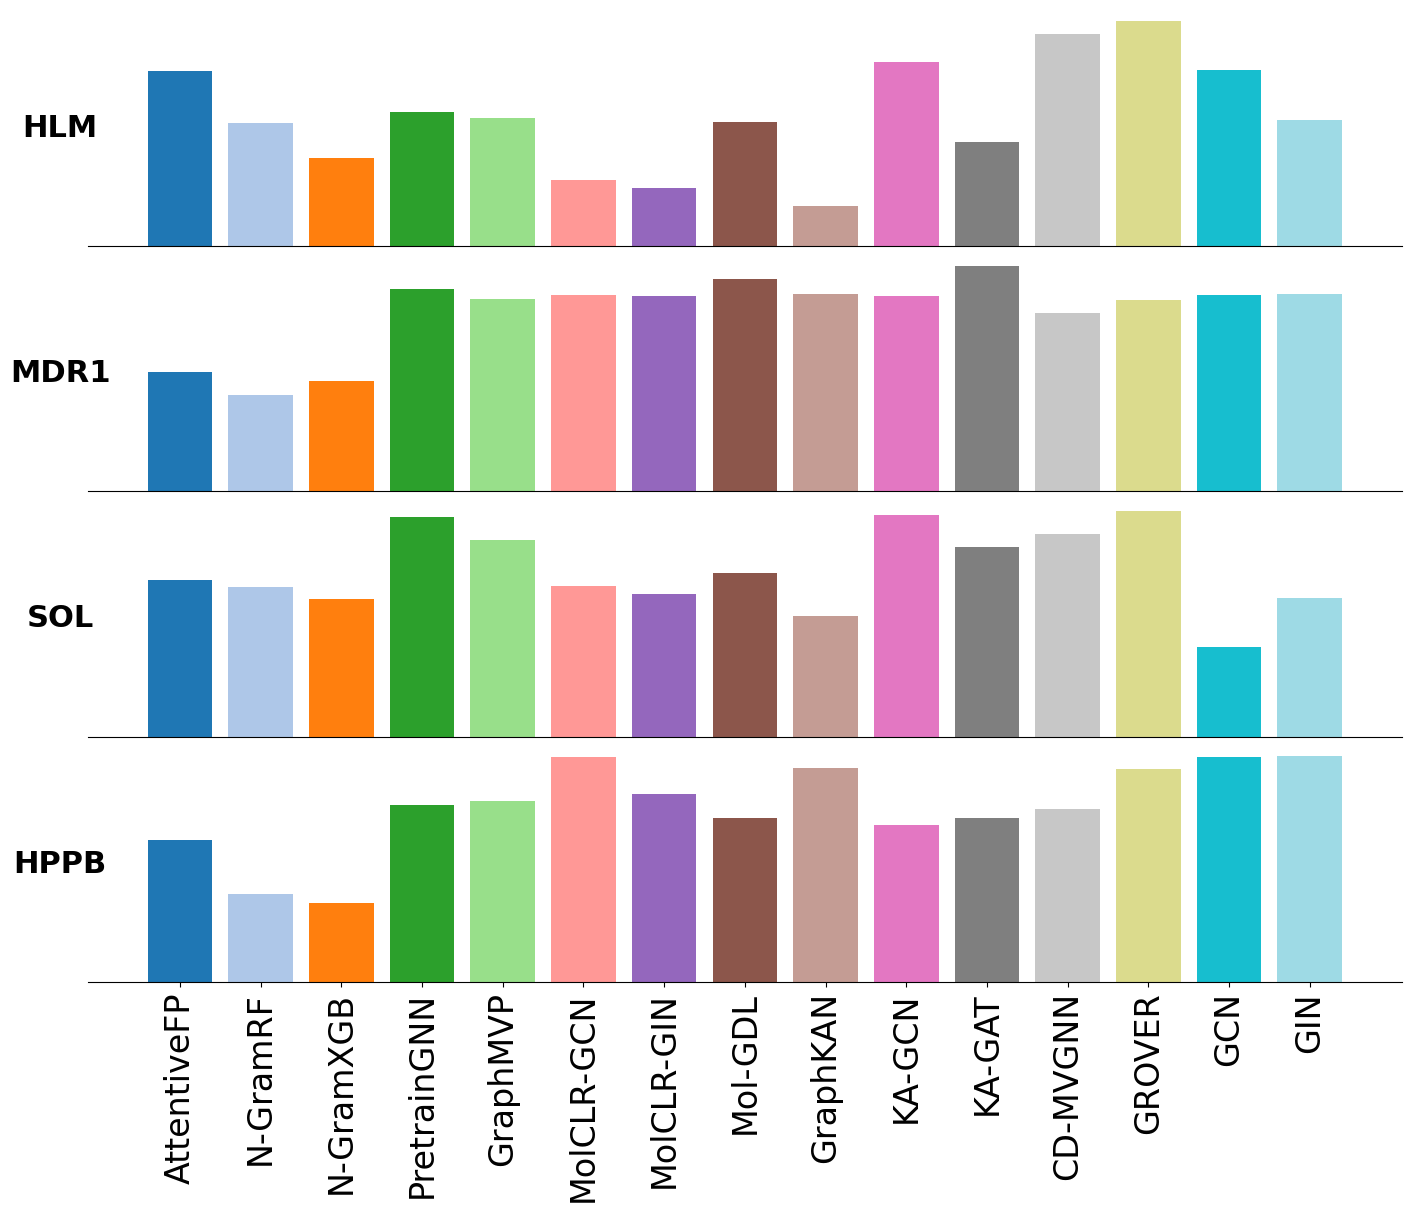

,Model,Split,HLM,RLM,ER,Solub,hPPB,rPPB
0,AttentiveFP,Time,0.4377,0.4694,0.3783,0.3917,0.5843,0.4222
1,N-GramRF,Time,0.3080,0.1429,0.3069,0.3739,0.3621,0.2404
2,N-GramXGB,Time,0.2194,0.1839,0.3487,0.3448,0.3244,0.1651
3,PretrainGNN,Time,0.3357,0.2222,0.6413,0.5498,0.7269,0.4867
4,GraphMVP,Time,0.3201,0.1116,0.6107,0.4901,0.7450,0.5180


In [8]:
# Global font style
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 11

# 1) Read data
candidate_paths = [
    Path("../assets/adme_splitting.xlsx"),
    Path("assets/adme_splitting.xlsx"),
]

file_path = next((p for p in candidate_paths if p.exists()), None)
if file_path is None:
    raise FileNotFoundError("Cannot find assets/adme_splitting.xlsx")

df = pd.read_excel(file_path)

# 2) Dataset mapping required by user
# HLM -> HLM, MDR1 -> ER, SOL -> Solub, HPPB -> hPPB
dataset_columns = [
    ("HLM", "HLM"),
    ("MDR1", "ER"),
    ("SOL", "Solub"),
    ("HPPB", "hPPB"),
]

# Keep model order exactly as in Excel
ordered_models = df["Model"].astype(str).tolist()
unique_models = list(dict.fromkeys(ordered_models))

# Assign a distinct color for each model (consistent across all subplots)
cmap = plt.get_cmap("tab20", len(unique_models))
model_color = {model: cmap(i) for i, model in enumerate(unique_models)}

# 3) Draw 4x1 figure
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=False, constrained_layout=True)

for row_idx, (ax, (dataset_name, col_name)) in enumerate(zip(axes, dataset_columns)):
    data = df[["Model", col_name]].dropna().copy()

    x = np.arange(len(data))
    colors = [model_color[m] for m in data["Model"].astype(str)]

    ax.bar(x, data[col_name].values, color=colors)

    # Hide left numeric ticks and y-axis label; keep only dataset name on the left
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylabel(
        dataset_name,
        rotation=0,
        labelpad=20,
        va="center",
        fontsize=22,
        fontweight="bold",
    )

    # Keep subtle horizontal guide lines
    ax.grid(axis="y", linestyle="--", alpha=0.25)

    # Only show model names on the bottom subplot
    if row_idx < 3:
        ax.set_xticks([])
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(
            data["Model"].astype(str),
            rotation=90,
            ha="center",
            va="top",
            fontsize=24,
            fontweight="regular",
        )
        ax.set_xlabel("")

# Remove top title
plt.show()

df.head()